In [14]:
import json
import mplcursors
import pandas as pd
import seaborn as sns
from PIL.ImageQt import rgb
from pandas import Series
import matplotlib.pyplot as plt

from pandas.io.json import json_normalize

with open('data.json','r') as f:
    data = json.loads(f.read())

df = pd.json_normalize(data, meta='title', record_path=['results'])

df['year'] = df['year'].astype(int)
df['rating'] = pd.to_numeric(df['rating'])
df['metascore'] = pd.to_numeric(df['metascore'])/10
df = df[['title','year', 'rating', 'metascore', 'genre']]

In [15]:
df.head()

,title,year,rating,metascore,genre
0,The Shawshank Redemption,1994,9.3,8.1,Drama
1,The Godfather,1972,9.2,10.0,Crime Drama
2,The Dark Knight,2008,9.1,8.4,Action Crime Drama
3,The Godfather: Part II,1974,9.0,9.0,Crime Drama
4,12 Angry Men,1957,9.0,9.6,Crime Drama


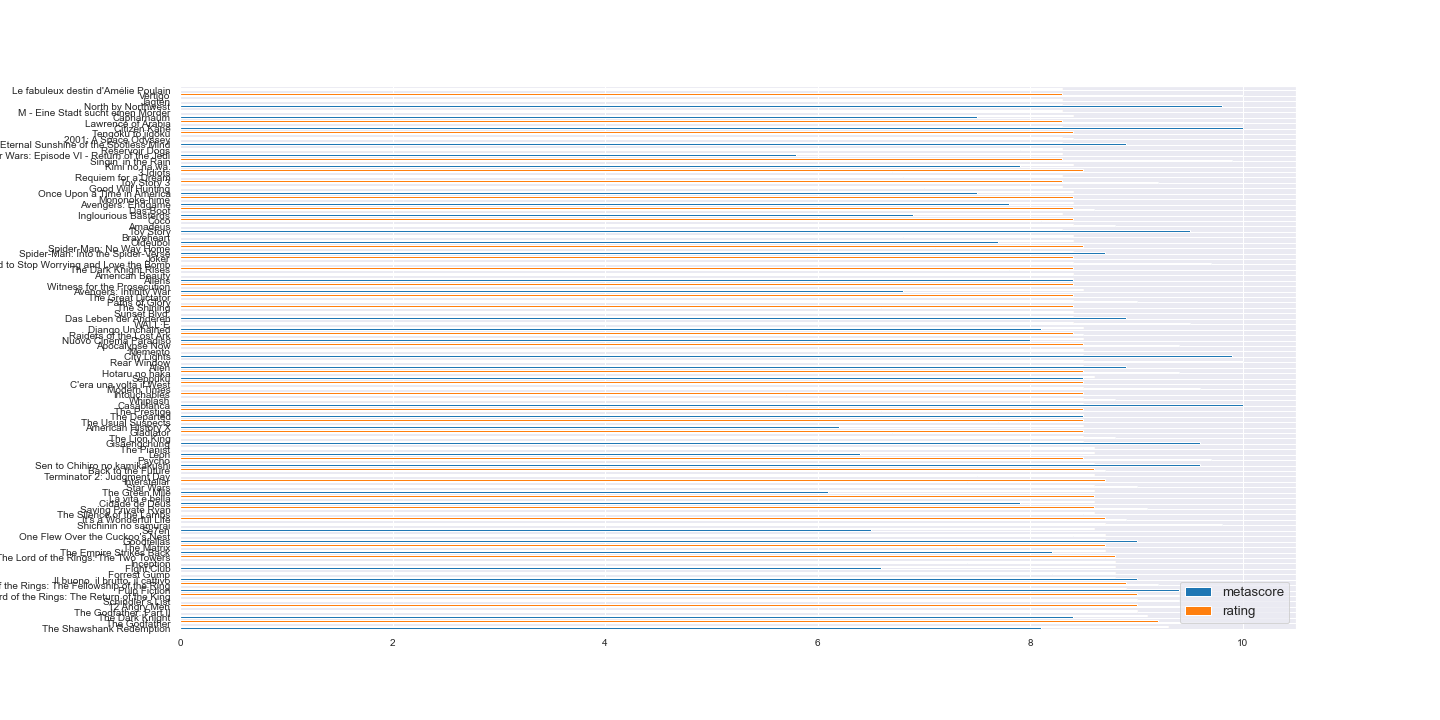

In [38]:
plt.rcParams['figure.figsize'] = [20, 10]

df.plot(x='title', y=['metascore', 'rating'], kind='barh', align='edge', fontsize=10)

plt.show()

# Films per Decade

Preparation and setting dataframe's content

In [3]:
df = df[['title', 'year', 'metascore', 'rating', 'genre']]

s = df['genre'].str.split(' ').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genre'
del df['genre']
df2 = df.join(s)

df2 = df2.groupby(['year', 'genre'], sort=True)['year'].count()
df_year = df2.to_frame(name = 'genre count').reset_index()

df_year['decade'] = (10 * (df_year['year'] // 10)).astype(str) + 's'

df_dec = df_year.groupby(['decade', 'genre'], sort=True)['year'].count()
df_dec = df_dec.to_frame(name = 'genre count').reset_index()

    decade      genre  genre count
0    1930s     Comedy            2
1    1930s      Crime            1
2    1930s      Drama            2
3    1930s    Mystery            1
4    1930s    Romance            2
..     ...        ...          ...
96   2010s   Thriller            1
97   2010s    Western            1
98   2020s     Action            1
99   2020s  Adventure            1
100  2020s    Fantasy            1

[101 rows x 3 columns]


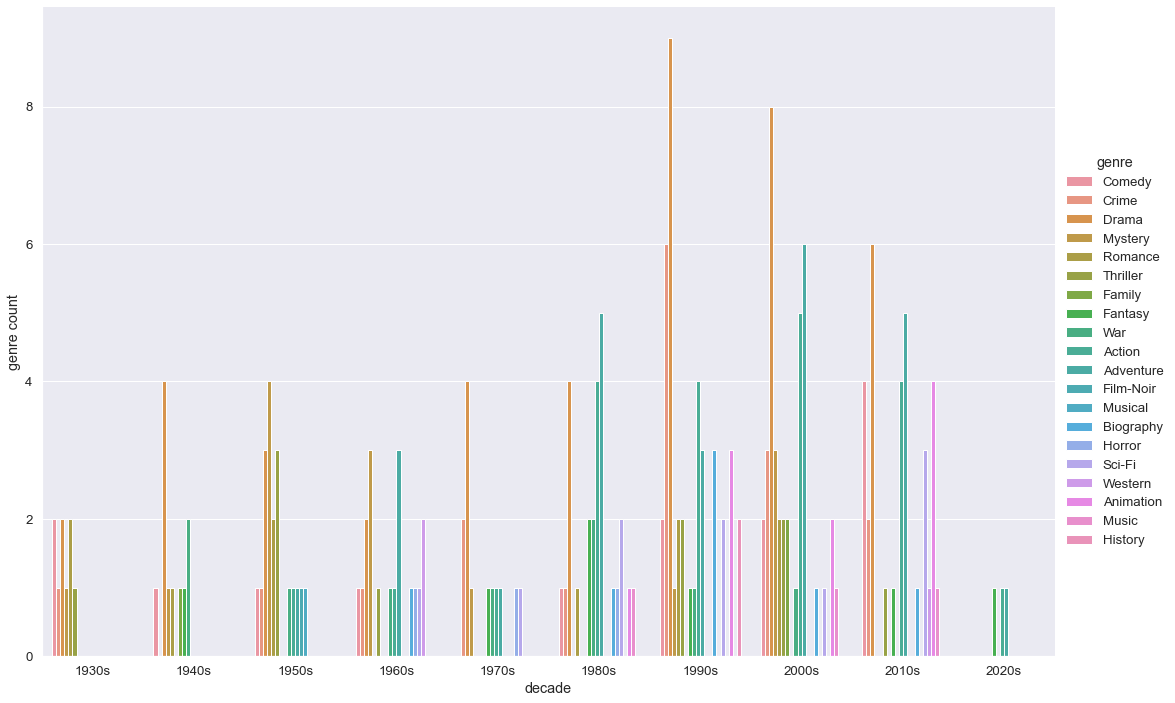

In [4]:
plt.rcParams['figure.figsize'] = (10, 5)

sns.set_context('notebook', font_scale=1.2)
sns.set_style('darkgrid')

print(df_dec)
sns.catplot(x='decade', y='genre count', hue='genre', data=df_dec, kind='bar', height=10, aspect=15/10)
sns.despine()

Show data in function of selected genre er year

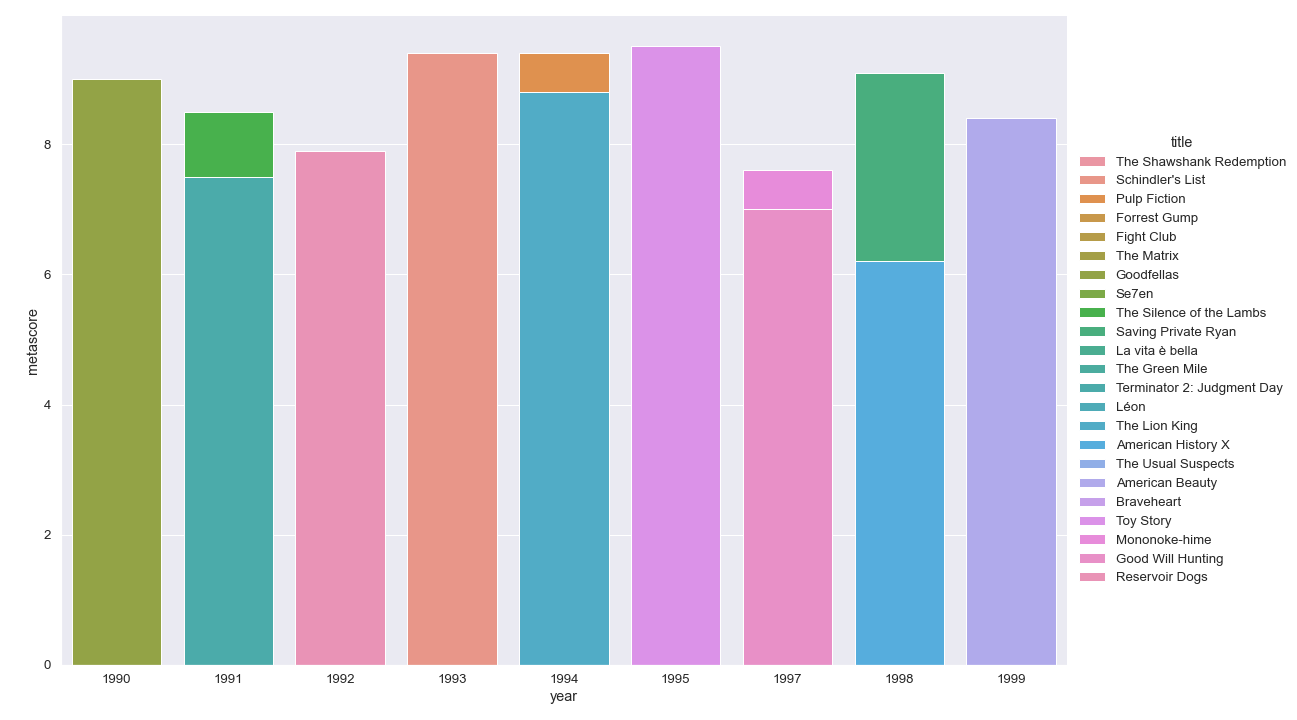

In [18]:
def show_decade(decade):
    df = pd.json_normalize(data, meta='title', record_path=['results'])

    df['year'] = df['year'].astype(int)
    df['rating'] = pd.to_numeric(df['rating'])
    df['metascore'] = pd.to_numeric(df['metascore'])/10
    df['decade'] = (10 * (df['year'] // 10)).astype(str) + 's'

    df = df[['title','year', 'rating', 'metascore', 'genre', 'decade']]

    index_decades = df[ df['decade'] != decade ].index

    df.drop(index_decades, inplace = True)

    s = df['genre'].str.split(' ').apply(Series, 1).stack()
    s.index = s.index.droplevel(-1)
    s.name = 'genre'
    del df['genre']
    df2 = df.join(s)

    sns.catplot(x='year', y='metascore', hue='title', data=df2, kind='bar', height=10, aspect=15/10, dodge=False)
    sns.despine()

show_decade('1990s')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


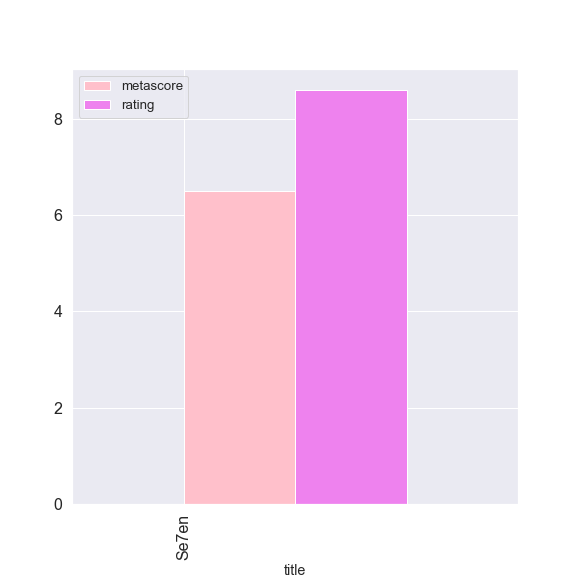

In [48]:
def show_movie(title):
    plt.rcParams['figure.figsize'] = (8, 8)
    df = pd.json_normalize(data, meta='title', record_path=['results'])

    df['rating'] = pd.to_numeric(df['rating'])
    df['metascore'] = pd.to_numeric(df['metascore'])/10

    df = df[['title', 'rating', 'metascore']]

    index_title = df[ df['title'] != title ].index

    df.drop(index_title, inplace = True)

    df.plot(x='title', y=['metascore', 'rating'], kind='bar', align='edge', fontsize=16, color=['pink', 'violet'])
    plt.show()
show_movie('Se7en')